# AB_plot_results

In [92]:
import matplotlib.lines as mlines
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd 
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import  hstack
from astropy.table import  vstack
from astropy.table import Column
from astropy.table import join
import pandas as pd


from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

In [91]:
prior = 'Jeff2' ; date = '181128'  # running in iPython
i = 6000
fname = date + '_Celerite_sim_and_real_'+prior+'_'+str(i)+'.npy'
r = np.load(fname).item()

### Simulated LCs...

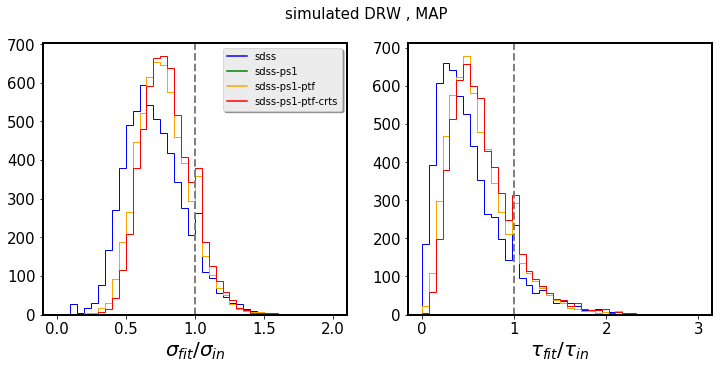

In [93]:
%matplotlib inline
import matplotlib.lines as mlines

sim = 'simulated' # 'real 
fit = 'MAP' # EXP 

seg = list(r[sim].keys())

d1 = pd.DataFrame.from_dict(r[sim][seg[0]])
t1 = Table.from_pandas(d1)

d2 = pd.DataFrame.from_dict(r[sim][seg[1]])
t2 = Table.from_pandas(d2)

t12 =  join(t1,t2, keys='lcname', table_names=[seg[0] ,seg[1]])

d3 = pd.DataFrame.from_dict(r[sim][seg[2]])
t3 = Table.from_pandas(d3)

d4 = pd.DataFrame.from_dict(r[sim][seg[3]])
t4 = Table.from_pandas(d4)

t34  = join(t2,t4,keys='lcname', table_names=[seg[2], seg[3]])
tall = join(t12, t34, keys='lcname')


# Input parameters for fitting ... 
SF_inf = 0.2  # mags 
sigma_in = SF_inf / np.sqrt(2)
tau_in = 575 # days 


fig,ax = plt.subplots(1,2, figsize=(12,5))
colors= ['blue','green', 'orange',  'red']
ax_legend_handles =  []

i = 0 
for s in seg : 
    ax[0].hist(tall['sigma'+fit+'_'+s] / sigma_in , histtype='step', 
               bins=40, range=[0,2], color = colors[i]) 
    ax[0].set_xlabel(r'$\sigma_{fit} / \sigma_{in}$')
    line = mlines.Line2D([], [],  color=colors[i], label=s)
    ax_legend_handles.append(line)
    i += 1 


i = 0 
for s in seg : 
    ax[1].hist(tall['tau'+fit+'_'+s] / float(tau_in) , histtype='step', 
               bins=40, range=[0,3], color = colors[i]) 
    ax[1].set_xlabel(r'$\tau_{fit} / \tau_{in}$')
    i += 1 

fig.add_axes    
    
ax[0].legend(loc='upper right', handles = ax_legend_handles,
             bbox_to_anchor=(1.0, 1.0),
             ncol=1, fancybox=True, shadow=True ) 
             
ax[0].axvline(1, lw=2, ls='--', c='grey')
ax[1].axvline(1, lw=2, ls='--', c='grey')



fig.suptitle(sim + ' DRW , '+ fit , fontsize = 15)
plt.savefig(sim + 'DRW_'+prior+fit+'.png', bbox_inches="tight")

### Real LCs...

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


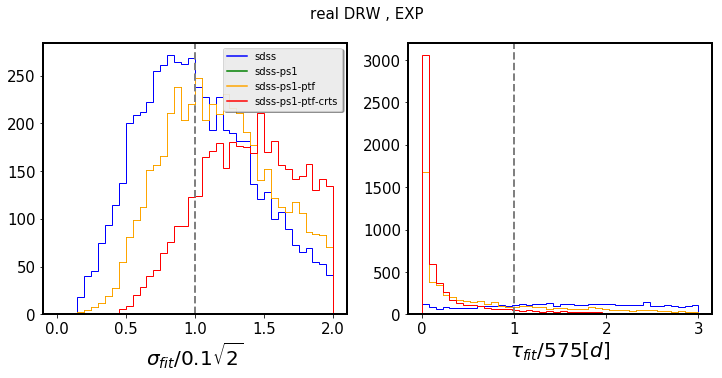

In [95]:
%matplotlib inline
import matplotlib.lines as mlines

sim =  'real'
fit = 'EXP'# 'MAP' # EXP 

seg = list(r[sim].keys())

d1 = pd.DataFrame.from_dict(r[sim][seg[0]])
t1 = Table.from_pandas(d1)

d2 = pd.DataFrame.from_dict(r[sim][seg[1]])
t2 = Table.from_pandas(d2)

t12 =  join(t1,t2, keys='lcname', table_names=[seg[0] ,seg[1]])

d3 = pd.DataFrame.from_dict(r[sim][seg[2]])
t3 = Table.from_pandas(d3)

d4 = pd.DataFrame.from_dict(r[sim][seg[3]])
t4 = Table.from_pandas(d4)

t34  = join(t2,t4,keys='lcname', table_names=[seg[2], seg[3]])
tall = join(t12, t34, keys='lcname')


# Input parameters for fitting ... 
SF_inf = 0.2  # mags 
sigma_in = SF_inf / np.sqrt(2)
tau_in = 575 # days 


fig,ax = plt.subplots(1,2, figsize=(12,5))
colors= ['blue','green', 'orange',  'red']
ax_legend_handles =  []

i = 0 
for s in seg : 
    ax[0].hist(tall['sigma'+fit+'_'+s] / sigma_in , histtype='step', 
               bins=40, range=[0,2], color = colors[i]) 
    ax[0].set_xlabel(r'$\sigma_{fit} / 0.1 \sqrt{2}$')
    line = mlines.Line2D([], [],  color=colors[i], label=s)
    ax_legend_handles.append(line)
    i += 1 


i = 0 
for s in seg : 
    ax[1].hist(tall['tau'+fit+'_'+s] / float(tau_in) , histtype='step', 
               bins=40, range=[0,3], color = colors[i]) 
    ax[1].set_xlabel(r'$\tau_{fit} / 575 [d]$')
    i += 1 

fig.add_axes    
    
ax[0].legend(loc='upper right', handles = ax_legend_handles,
             bbox_to_anchor=(1.0, 1.0),
             ncol=1, fancybox=True, shadow=True ) 
             
ax[0].axvline(1, lw=2, ls='--', c='grey')
ax[1].axvline(1, lw=2, ls='--', c='grey')



fig.suptitle(sim + ' DRW , '+ fit , fontsize = 15)
plt.savefig(sim + 'DRW_'+prior+fit+'.png', bbox_inches="tight")

### Check baselines 

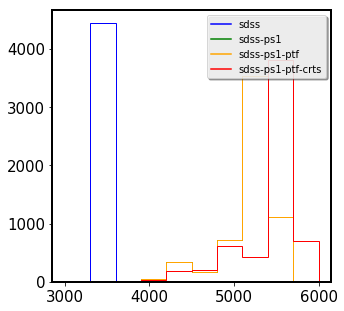

In [129]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
i = 0 
for s in seg : 
    ax.hist(tall['length_'+s] , histtype='step', 
               range = [3000,6000], color = colors[i]) 
    i += 1 
ax.legend(loc='upper right', handles = ax_legend_handles,
             bbox_to_anchor=(1.0, 1.0),
             ncol=1, fancybox=True, shadow=True ) 

### Check baseline increase with adding data 

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
segs = ['','-ps1', '-ps1-ptf', '-ps1-ptf-crts']
for i in range(len(segs)-1):# in segs:
    ax.hist(tall['length_sdss'+segs[i+1]] - tall['length_sdss'+segs[i]],
            bins=30, label=segs[i+1])#, normed=True)
ax.legend()

### Check $\rho$ = fitted timescale / baseline  

In [182]:
r['real']['sdss-ps1']['tauEXP']

[867.47428026817192,
 597.03089789162141,
 1.0086636786498557,
 62.957309830220566,
 4.7520008472279862,
 2465.4941013628536,
 889.33558587700816,
 41.906656207631499,
 71.886525777299966,
 42.709155714754615,
 1.0046090621827433,
 92.080156317027289,
 95.664077538625605,
 47.84041632643131,
 120.71968187708755,
 90.225186005970841,
 1.167844988976019,
 400.09987297736126,
 796.74814116996151,
 57.136472643652205,
 1859.6972581608438,
 1101.4659866171901,
 1.0001437864423097,
 1073.5902778174661,
 1.0749379474998586,
 312.34589104355251,
 10.873763337985704,
 1.0328669648047437,
 1.0289829255289507,
 1415.9451155349925,
 513.05533724904831,
 1107.931417998916,
 875.81902411003148,
 32.437139524605975,
 1.0781814786593824,
 1.0074255548042863,
 664.12847307771005,
 1612.148742198128,
 8.7619258301093961,
 132.71850372939392,
 58.334377381037818,
 786.5220552631705,
 nan,
 306.96193032485968,
 224.12685022970723,
 604.22203710995348,
 857.6101066121314,
 33.501171296582207,
 1.0104906964

In [203]:

tables = {}
for sim in  [ 'real' , 'simulated']:
    seg = list(r[sim].keys())

    d1 = pd.DataFrame.from_dict(r[sim][seg[0]])
    t1 = Table.from_pandas(d1)

    d2 = pd.DataFrame.from_dict(r[sim][seg[1]])
    t2 = Table.from_pandas(d2)

    t12 =  join(t1,t2, keys='lcname', table_names=[seg[0] ,seg[1]])

    d3 = pd.DataFrame.from_dict(r[sim][seg[2]])
    t3 = Table.from_pandas(d3)

    d4 = pd.DataFrame.from_dict(r[sim][seg[3]])
    t4 = Table.from_pandas(d4)

    t34  = join(t2,t4,keys='lcname', table_names=[seg[2], seg[3]])
    tall = join(t12, t34, keys='lcname')
    tables[sim] = tall

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


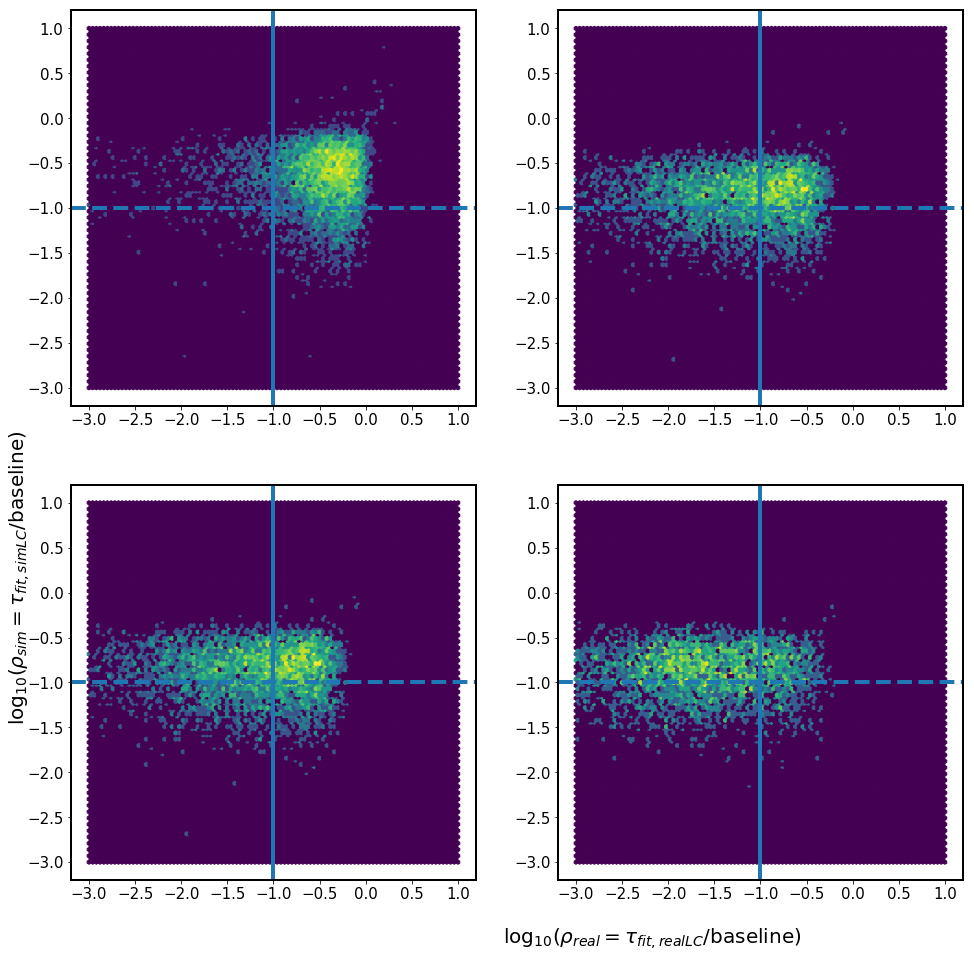

In [242]:

seg = list(r[sim].keys()) 
fig,axs = plt.subplots(2,2,figsize=(16,16))
ax = np.ravel(axs)
i = 0 
for s in seg :
    t = tables['real']
    bad = t['tau'+fit+'_'+s].mask == True 
    t[bad] = 0 
    rho_real = t['tau'+fit+'_'+s]/  t['length_'+s]

    t = tables['simulated']
    bad = t['tau'+fit+'_'+s].mask == True 
    t[bad] = 0 
    rho_sim = t['tau'+fit+'_'+s] / t['length_'+s]
    ax[i].hexbin(np.log10(rho_real), np.log10(rho_sim), extent=[-3,1, -3,1], bins='log', 
             )#, label=s)
    ax[i].axhline(-1, lw=4, ls='--')
    ax[i].axvline(-1, lw=4, ls='-')
    i += 1 
fig.text(0.07,0.5,r'$\log_{10}{(\rho_{sim} = \tau_{fit,simLC} / \mathrm{baseline})}$', 
         rotation=90, fontsize=20)
fig.text(0.5,0.07, r'$\log_{10}{(\rho_{real} = \tau_{fit,realLC} / \mathrm{baseline})}$', 
         fontsize=20)

The above shows what space is probed by the light curves, i.e. the ratio of inferred timescale to the baseline. In both cases the quantities are inferred, so it should not be seen as a comparison to Fig.2 , but rather both x and y  show the distribution of the output ($\rho_{out}$) .

In reality we only know the input for simulated light curves,  since for all the input is 575 days. There $\rho_{in} = 575 \mathrm{d} / \mathrm{baseline}$, and $\rho_{out} = \tau_{fit} / \mathrm{baseline}$ : 

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


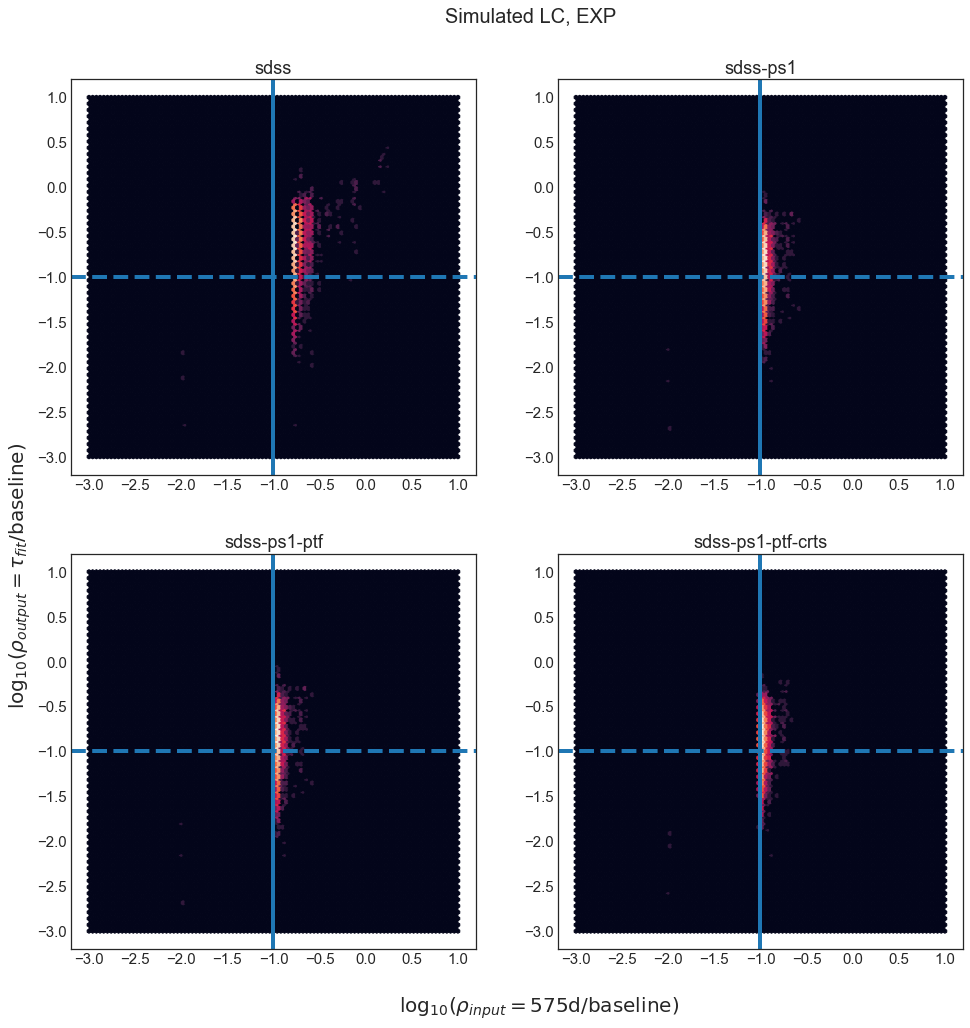

In [288]:

seg = list(r[sim].keys()) 
fig,axs = plt.subplots(2,2,figsize=(16,16))
ax = np.ravel(axs)
i = 0 
fit = 'EXP'
sim  = 'simulated'

for s in seg :
    t = tables[sim]
    
    bad = t['tau'+fit+'_'+s].mask == True 
    t[bad] = 0 
    rho_input = 575 /  t['length_'+s]
    rho_output = t['tau'+fit+'_'+s] / t['length_'+s]

    ax[i].hexbin(np.log10(rho_input), np.log10(rho_output), 
                 extent=[-3,1, -3,1], bins='log', 
             )#, label=s)
    ax[i].axhline(-1, lw=4, ls='--')
    ax[i].axvline(-1, lw=4, ls='-')
    ax[i].set_title(s)
    i += 1 
fig.text(0.45,0.93, 'Simulated LC, '+fit, fontsize=20)
fig.text(0.41,0.07,r'$\log_{10}{(\rho_{input} = 575 \mathrm{d} / \mathrm{baseline})}$', 
          fontsize=20)
fig.text(0.07,0.55 , r'$\log_{10}{(\rho_{output} = \tau_{fit} / \mathrm{baseline})}$', 
         fontsize=20,rotation=90,)

This shows which fragment of Fig.2 we were sampling with the simulated DRW. 

Now, is there much difference between the EXP and MAP result when it comes to showing what $\rho$ space is occupied?  This is to find out how long it would take to make a Fig.2 equivalent for each light curve, and given the fitted $\rho$,  the spread in Fig.2 for that particular output would specify what is the statistical spread of the possible input. 

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


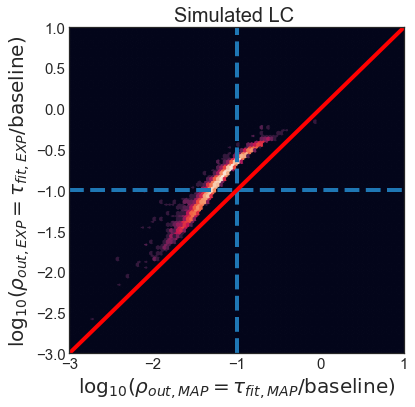

In [289]:
# rho_fit ( MAP )  vs rho_fit (EXP )

fig,axs = plt.subplots(1,1,figsize=(6,6))
ax = np.ravel(axs)
i = 0 
fit = 'MAP'
sim  = 'simulated'
rho = {}
for fit in ['MAP', 'EXP']:
    s = seg[-1] # only plot sdss-psq-ptf-crts : the full length 
    t = tables[sim]
    bad = t['tau'+fit+'_'+s].mask == True 
    t[bad] = 0 
    
    rho[fit] = t['tau'+fit+'_'+s] / t['length_'+s]

ax[i].hexbin(np.log10(rho['MAP']), np.log10(rho['EXP']), 
                 extent=[-3,1, -3,1], bins='log', 
             )#, label=s)
ax[i].axhline(-1, lw=4, ls='--')
ax[i].axvline(-1, lw=4, ls='--')
x = np.linspace(-3,1,100)
ax[i].plot(x,x,ls='-',lw=4,c='r')
ax[i].set_title(s)

ax[i].set_title('Simulated LC ', fontsize=20)
ax[i].set_xlabel(r'$\log_{10}{(\rho_{out,MAP} = \tau_{fit,MAP} / \mathrm{baseline})}$', 
          fontsize=20)
ax[i].set_ylabel( r'$\log_{10}{(\rho_{out,EXP} = \tau_{fit,EXP} / \mathrm{baseline})}$', 
         fontsize=20,)



Another way of looking at it is to plot Fig.2 equivalent twice : for MAP and EXP  solutions...  ( very useful : https://python-graph-gallery.com/1136-2/ ) 

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


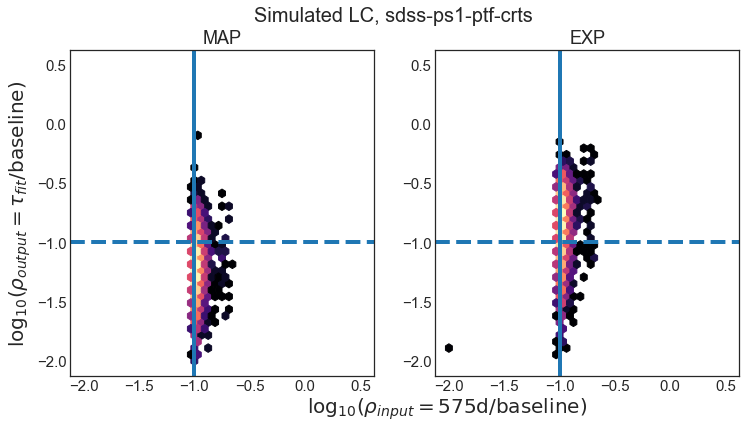

In [342]:
import seaborn as sns 


seg = list(r[sim].keys()) 
fig,axs = plt.subplots(1,2,figsize=(12,6))
ax = np.ravel(axs)
i = 0 
sim  = 'simulated'
s = seg[-1] # the full baseline
t = tables[sim]
rho_input = 575 /  t['length_'+s]

i = 0 
for fit in ['MAP','EXP']  :  
    bad = t['tau'+fit+'_'+s].mask == True 
    t[bad] = 0 
    rho_output = t['tau'+fit+'_'+s] / t['length_'+s]
    ax[i].hexbin(np.log10(rho_input), np.log10(rho_output),
                extent = [-2,0.5,-2,0.5], cmap='magma', bins='log', 
                mincnt=1, gridsize=40)
    ax[i].axhline(-1, lw=4, ls='--')
    ax[i].axvline(-1, lw=4, ls='-')
    ax[i].set_title(fit)
    i += 1 

fig.suptitle('Simulated LC, '+s, fontsize=20)
fig.text(0.40,0.04,r'$\log_{10}{(\rho_{input} = 575 \mathrm{d} / \mathrm{baseline})}$', 
          fontsize=20)
ax[0].set_ylabel( r'$\log_{10}{(\rho_{output} = \tau_{fit} / \mathrm{baseline})}$', 
         fontsize=20,)

In [335]:
plt.hexbin?

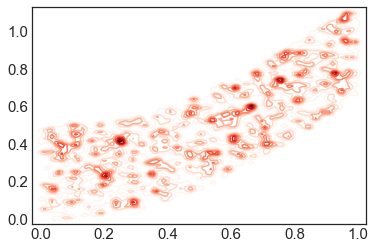

In [323]:
x = np.random.random(1000)
y = np.power(np.sin(x), 2.5) + 0.5 * np.random.random(1000)
sns.kdeplot(x,y, cmap="Reds", shade=False, bw=.01 ,
           legend=True)

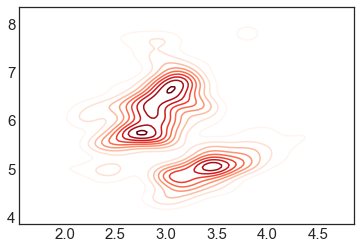

In [296]:
# library & dataset

df = sns.load_dataset('iris')
 
# Basic 2D density plot


#sns.plt.show()

# Custom it with the same argument as 1D density plot
sns.kdeplot(df.sepal_width, df.sepal_length, cmap="Reds", shade=False, bw=.15 ,
           legend=False)


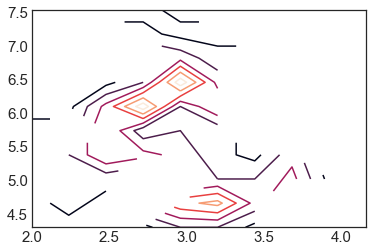

In [318]:
x = df.sepal_width
y = df.sepal_length
stats = binned_statistic_2d(x, y, values = x, statistic='count')
z_sigma, x_edges, y_edges = stats[0], stats[1], stats[2]
# replace all nan's by 0 ...
z_sigma[np.isnan(z_sigma)] =0 
z_reduce  =  z_sigma # [:-1, :-1] no need to reduce here because x_edges are already given with the right size 
z_min, z_max = z_reduce.min(), np.abs(z_reduce).max()
z_rot = np.rot90(z_reduce)  # rotate and flip to properly display... 
z_rot_flip = np.flipud(z_rot)
z_masked = np.ma.masked_where(z_rot_flip == 0 , z_rot_flip)  # mask out zeros... 

# Plot 2D histogram using pcolor

#image = ax.pcolormesh(x_edges,y_edges,z_masked, cmap='jet')  
plt.contour(x_edges[:-1], y_edges[:-1], z_masked)

Given the light curve,  find from the Fig.2 equivalent what is the spread for each LC ... 

In [344]:
from astropy.table import unique

# combined light curves 
saveDir = '../data_products/Combined_LC/'
lightcurve_list =  os.listdir(saveDir)

for i in range(len(lightcurve_list[:2])):
    print(i)
    lcname = lightcurve_list[i]
    lc_comb = Table.read(saveDir+lcname, format='ascii')
    lc_comb.sort('mjd')

    # keep only the first row if there are two that 
    # have the same MJD ...
    lc_comb = unique(lc_comb, keys='mjd', keep='first')
    lc_comb.rename_column('originSurvey', 'survey')
    
    # given mag ,  magerr  ,  and baseline, 
    # simulate DRWs  
    # to explore the rho_in = tau_in / baseline
    # between 0.001 and 10  ( -3 < log10(rho_in) < 1)
    
    
    

0
1


In [354]:
rho_grid

array([  1.00000000e-03,   1.10200291e-03,   1.21441041e-03,
         1.33828380e-03,   1.47479263e-03,   1.62522577e-03,
         1.79100352e-03,   1.97369109e-03,   2.17501331e-03,
         2.39687099e-03,   2.64135880e-03,   2.91078508e-03,
         3.20769362e-03,   3.53488769e-03,   3.89545651e-03,
         4.29280439e-03,   4.73068292e-03,   5.21322633e-03,
         5.74499057e-03,   6.33099630e-03,   6.97677633e-03,
         7.68842779e-03,   8.47266977e-03,   9.33690671e-03,
         1.02892983e-02,   1.13388367e-02,   1.24954310e-02,
         1.37700013e-02,   1.51745814e-02,   1.67224328e-02,
         1.84281696e-02,   2.03078964e-02,   2.23793609e-02,
         2.46621207e-02,   2.71777287e-02,   2.99499361e-02,
         3.30049166e-02,   3.63715140e-02,   4.00815142e-02,
         4.41699451e-02,   4.86754079e-02,   5.36404410e-02,
         5.91119219e-02,   6.51415097e-02,   7.17861331e-02,
         7.91085273e-02,   8.71778270e-02,   9.60702187e-02,
         1.05869660e-01,

In [357]:
import modules as mod

SFinf = 0.2
# explore a range of tau given the baseline
baseline = max(lc_comb['mjd']) - min(lc_comb['mjd'])
# rho_in = tau_in /  baseline 
rho_min, rho_max,  n_rho = 0.001, 15, 100
rho_grid = np.logspace(np.log10(rho_min), np.log10(rho_max), n_rho)

sim_lc = {}
sim_lc['mjd'] = lc_comb['mjd']
sim_lc['magerr'] = lc_comb['magerr']
sim_lc['lcname'] = lcname
sim_lc['baseline'] = baseline 
sim_lc['simlc'] = {}
i = 0 
for rho_in in rho_grid:  
    tau_in = rho_in * baseline 
    sim_lc['simlc'][i]=  {}
    
    if i % 10 == 0 :  print(i)
        # for each rho, simulate 100 light curves 
    for j in range(100):
        y = mod.sim_DRW_lightcurve(lc_comb['mjd'], SFinf, tau_in, 18)
        yobs = y + lc_comb['magerr'] * np.random.normal(loc=0,scale=1,
                                            size=len(lc_comb))
        sim_lc['simlc'][i][j] = yobs   
    i += 1
    

0
10
20
30
40
50
60
70
80
90


Thus it takes a minute to even make the light curves per input lc... 40 MB, since it's 10 000 light curves!   

In [359]:
np.save('../data_products/Combined_LC_sims/' + lcname , sim_lc )

Thus it would take 251 GB to even just store 6444 * 10000 light curves ... 

In [364]:
# Read in the simulated DRW and find MAP 
sim_lc = np.load('../data_products/Combined_LC_sims/' + lcname+'.npy').item()

In [366]:
sim_lc.keys()

dict_keys(['mjd', 'magerr', 'lcname', 'baseline', 'simlc'])

Find MAP for each of the 10 000 light curves ... The vertical spread is pretty similar, and faster to get MAP than EXP ...  

In [370]:
rho_min, rho_max,  n_rho = 0.001, 15, 100
rho_grid = np.logspace(np.log10(rho_min), np.log10(rho_max), n_rho)

yerr = sim_lc['magerr']
t  = sim_lc['mjd'] 

# startimg values
sigma_in = 0.2
tau_in = 100 
prior = 'Jeff2'
# set limits for grid, MAP , and prior 
sig_lims , tau_lims = [0.02,0.7], [1,5000]
    
    
results = {}
results['lcname'] = lcname

for i in range(len(rho_grid)): 
    results[i] = {'sigmaMAP':[], 'tauMAP':[], 'j':[]}
    if i % 10 == 0 :  print(i)
    for j in range(100):
        yobs = sim_lc['simlc'][i][j]
        # find the Celerite expectation value and MAP 
        # find the MAP estimate 
        sigmaMAP, tauMAP,gp = mod.find_celerite_MAP(t,yobs,yerr, 
                                  sigma_in, tau_in, prior=prior,set_bounds=True, 
                                  sig_lims=sig_lims, tau_lims=tau_lims ,
                                  verbose=False)
        # store the results 
        results[i]['sigmaMAP'].append(sigmaMAP)
        results[i]['tauMAP'].append(tauMAP)
        results[i]['j'].append(j)

0
10
20
30
40
50
60
70
80
90


Make Fig.2 for this LC: